# Análisis Exploratorio de Datos (EDA)

### Importamos librerias

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del archivo para el análisis de los datos

In [29]:
homicidios_combinado = pd.read_csv('datasets_limpios/homicidios_combinado.csv')

### 1. Comprensión del negocio

**Objetivo**
*   Conocer el contexto general para comprender los datos y así poder analizar las necesidades con el fin de brindar platenamientos coherentes a las solicitudes que se piden.

#### Observaciones y conclusiones:

Se realizará el análisis sobre una base de datos tomada para los accidentes viales para la ciudad de Buenos Aires desde el 2016 hasta el 2021 ya que es de suma importancia reducir las tasas de mortalidad relacionadas con sinietros viales a través de la prevención de los mismos.

Para tal fin es importante establecer ciertos objetivos y analizar sus respectivos indicadores de rendimiento (KPIs)

* **OBJETIVO 1:** Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.
* **KPI 1:** Se define la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
* **FORMULA 1:** (Número de homicidios en siniestros viales / Población total) * 100,000

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* **OBJETIVO 2:** Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.
* **KPI 2:** Se define la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
* **FORMULA 2 (porcentaje de variación):** [(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior)] * 100.

### 2. Comprensión del dataset `homicidios_combinado`

In [30]:
homicidios_combinado.info() # vemos como esta conformado el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     717 non-null    object
 1   N_VICTIMAS             717 non-null    int64 
 2   FECHA                  717 non-null    object
 3   AAAA                   717 non-null    int64 
 4   MM                     717 non-null    int64 
 5   FRANJA_HORARIA         717 non-null    object
 6   LUGAR_DEL_HECHO        717 non-null    object
 7   TIPO_DE_CALLE          717 non-null    object
 8   CALLE                  716 non-null    object
 9   DIRECCIÓN NORMALIZADA  708 non-null    object
 10  COMUNA                 717 non-null    int64 
 11  XY (CABA)              717 non-null    object
 12  POS X                  717 non-null    object
 13  POS Y                  717 non-null    object
 14  PARTICIPANTES          717 non-null    object
 15  ACUSADO                

In [31]:
homicidios_combinado.isnull().sum() # Vemos los nulos dentro del dataset

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
FRANJA_HORARIA           0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
CALLE                    1
DIRECCIÓN NORMALIZADA    9
COMUNA                   0
XY (CABA)                0
POS X                    0
POS Y                    0
PARTICIPANTES            0
ACUSADO                  0
ROL                      0
VICTIMA                  0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64

In [32]:
homicidios_combinado.dtypes #Vemos los tipos de datos del dataset

ID                       object
N_VICTIMAS                int64
FECHA                    object
AAAA                      int64
MM                        int64
FRANJA_HORARIA           object
LUGAR_DEL_HECHO          object
TIPO_DE_CALLE            object
CALLE                    object
DIRECCIÓN NORMALIZADA    object
COMUNA                    int64
XY (CABA)                object
POS X                    object
POS Y                    object
PARTICIPANTES            object
ACUSADO                  object
ROL                      object
VICTIMA                  object
SEXO                     object
EDAD                     object
FECHA_FALLECIMIENTO      object
dtype: object

#### Variables Categóricas
* ID: Identificador unico del siniestro
* FECHA: Fecha del siniestro
* LUGAR_DEL_HECHO: Direccion del siniestro
* TIPO_DE_CALLE: Tipo de arteria. 
* CALLE: Nombre de la arteria donde se produjo el siniestro.
* DIRECCIÓN NORMALIZADA: Direccion en formato normalizado USIG.
* COMUNA: Comuna de la ciudad (1 a 15)
* XY (CABA): Geocodificacion plana.
* PARTICIPANTES: Conjuncion de victima y acusado
* ACUSADO: Vehiculo que ocupaba quien resulto acusado/a del siniestro.
* ROL: Posicion relativa al vehiculo que presentaba la victima en el momento del siniestro.
* VICTIMA: Vehiculo que ocupaba quien haya fallecido o se haya lastimado durante el siniestro.
* SEXO: Sexo de la victima.
* FECHA_FALLECIMIENTO: Fecha de fallecimiento de la victima.



#### Variables Numéricas
* N_VICTIMAS: Cantidad de victimas en el siniestro.
* AAAA: Año que ocurrio el siniestro.
* MM: Mes que ocurrio el siniestro. 
* FRANJA_HORARIA: Franja horaria.
* POS X: Longitud con separador punto. WGS84
* POS Y: Latitud con separador punto. WGS84
* EDAD: Edad de la victima al momento del siniestro.

### 3. Limpieza de los datos

la limpieza del dataset `homicidios_combinado` se realizo en el archivo `ETL(homicidios_combinado).ipynb`, alli podras encontrar el paso a paso que se llevo a cabo. 

### 4. Análisis Univariado

**Objetivo:**
* Calcular estadísticas descriptivas básicas, como la media, la mediana, la desviación estándar, los percentiles, etc., para cada variable numérica.
* Obtener conteos y proporciones para variables categóricas.
* Crear gráficos y visualizaciones por variable para comprender la distribución de los datos.
* Identificar valores atípicos (outliers) que puedan requerir una atención especial.

**Variables numéricas:** 
* Estadísticas descriptivas básicas de cada columna, para esto crearemos una funcion que nos devuelva todos los datos de interes.

In [34]:
def col_statistics(df, col):
    '''
    Función para obtener los valores estadísticos de una columna
    '''
    columna = df[col]
    # Cantidad de registros unicos de la columna
    print("registros únicos: ", columna.nunique())

    # estadisticas generales
    print()
    print(columna.describe())

    # Porcentaje que representa cada valor dato respecto a toda la columna
    conteo_datos = columna.value_counts()
    total_datos = len(columna)
    porcentaje_victimas = round((conteo_datos / total_datos) * 100, 2)

    # Combina los resultados en un nuevo DataFrame
    resultados = pd.DataFrame({"Cantidad": conteo_datos, "Porcentaje (%)": porcentaje_victimas})
    
    # y deseas ordenarlo de manera descendente según la columna "Cantidad"
    resultados = resultados.sort_values(by="Cantidad", ascending=False)

    print()
    print(resultados)

`N_VICTIMAS`

In [35]:
#Llamamos a la funcion para la columna 'N_VICTIMAS'
col_statistics(homicidios_combinado, 'N_VICTIMAS')

registros únicos:  3

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

            Cantidad  Porcentaje (%)
N_VICTIMAS                          
1                676           94.28
2                 38            5.30
3                  3            0.42


**Conclusiones [N_VICTIMAS]**
* Solo hay 3 posibilidades de victimas por accidente: 1, 2, 3
* La media del numero de victimas por accidente es aproximadamente 1.06, lo que indica que en promedio, la mayoria de los accidentes tienen una sola victima.
* mayor frecuencia de vicitmas por accidente es de: 1 (94.28%)
* menor frecuencia de victimas por accidente es de : 3 (0.42%)

Se procede a realizar un Countplot para ver la distribución de víctimas fatales por siniestro

C:\Users\Leo\AppData\Local\Temp\ipykernel_21860\3905884591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")


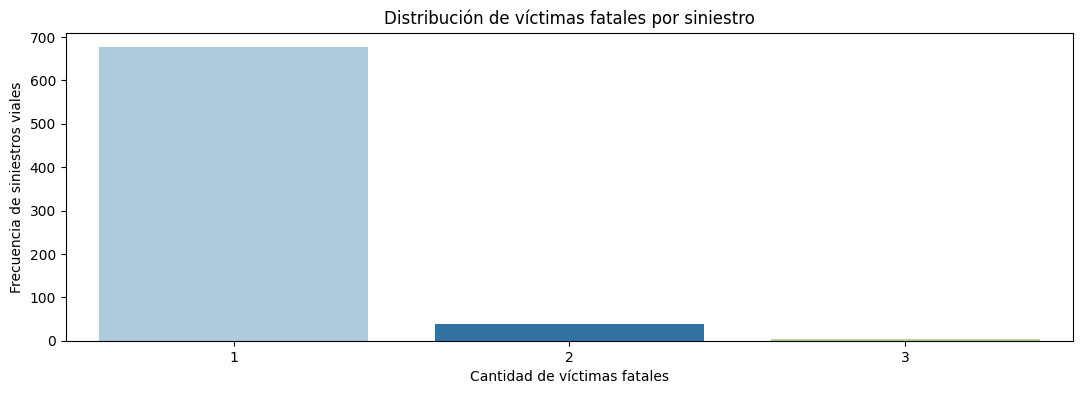

In [36]:
plt.figure(figsize=(13, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = homicidios_combinado[homicidios_combinado["N_VICTIMAS"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='N_VICTIMAS', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Distribución de víctimas fatales por siniestro")

plt.show()

`VICTIMAS`

In [37]:
#Llamamos a la funcion para la columna 'VICTIMA'
col_statistics(homicidios_combinado, 'VICTIMA')

registros únicos:  8

count      717
unique       8
top       MOTO
freq       303
Name: VICTIMA, dtype: object

           Cantidad  Porcentaje (%)
VICTIMA                            
MOTO            303           42.26
PEATON          267           37.24
AUTO             94           13.11
BICICLETA        29            4.04
SD                9            1.26
CARGAS            7            0.98
PASAJEROS         5            0.70
MOVIL             3            0.42


**Conclusiones [VICTIMA]**
* Existen 8 tipos diferentes de victimas involucradas.
* El valor mas frecuente es 'MOTO'. Esto quiere decir que 'MOTO' es el tipo de victima mas frecuente en los siniestros viales.
* hay 303 accidentes donde el tipo 'MOTO' estuvo involucrado, esto representa el 42.26% del total de accidentes viales.
* Victima con mayor frecuencia es: 'MOTO' (42.26%)
* Victima con menor frecuencia es: 'MOVIL' (0.42%)

Se procede a hacer un barplot para el conteo de tipos de victimas 

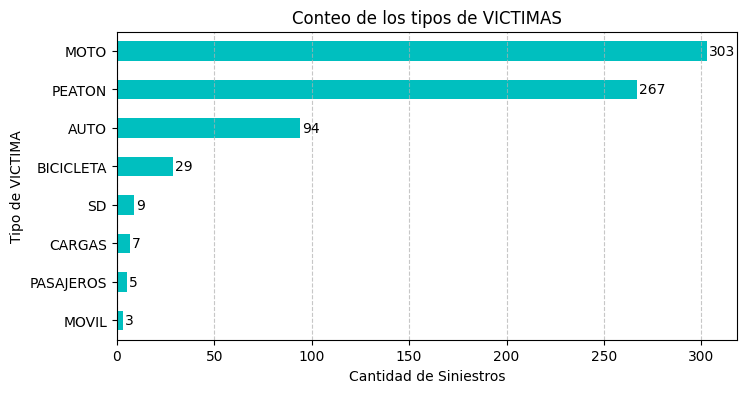

In [38]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["VICTIMA"]

# Contar la frecuencia de cada valor único en la columna
conteo_valores = columna.value_counts()
conteo_valores = conteo_valores.sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='c')
plt.title("Conteo de los tipos de VICTIMAS")
plt.xlabel("Cantidad de Siniestros")
plt.ylabel("Tipo de VICTIMA")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

`ACUSADO`

In [39]:
#Llamamos a la funcion para la columna 'ACUSADO'
col_statistics(homicidios_combinado, 'ACUSADO')

registros únicos:  10

count      717
unique      10
top       AUTO
freq       208
Name: ACUSADO, dtype: object

             Cantidad  Porcentaje (%)
ACUSADO                              
AUTO              208           29.01
PASAJEROS         178           24.83
CARGAS            150           20.92
OBJETO FIJO        69            9.62
MOTO               58            8.09
SD                 23            3.21
MULTIPLE           17            2.37
BICICLETA           7            0.98
OTRO                6            0.84
TREN                1            0.14


**Conclusiones [ACUSADO]**
* Existen 10 registros únicos dentro de la columna 'ACUSADO'. Esto significa que existen 10 tipos diferentes de vehiculos acusados en los siniestros viales.
* El valor mas frecuente en la columna 'ACUSADO' es 'AUTO'. Esto significa que 'AUTO' es el vehiculo acusado con la mayor cantidad de siniestros viales. se pueden contar 208 siniestros a manos de este vehiculo.
* Acusado con mayor frecuencia: 'AUTO' (29.01%)
* Acusado con menor frecuencia: 'TREN' (0.14%)

Se procede a crear un barplot con el conteo de valores en la columna ACUSADO.

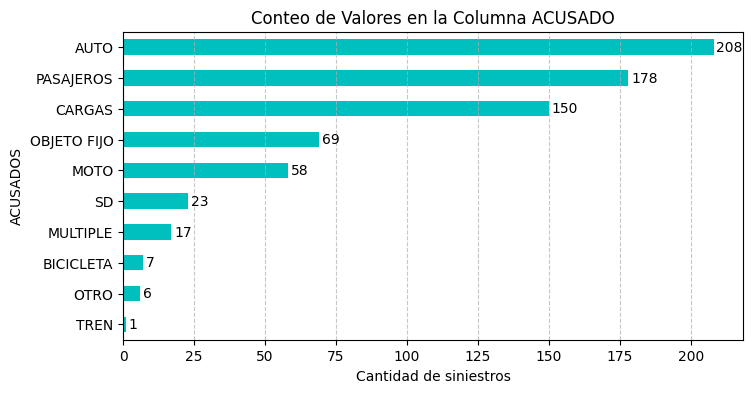

In [40]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["ACUSADO"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='barh', color='c')
plt.title("Conteo de Valores en la Columna ACUSADO")
plt.xlabel("Cantidad de siniestros")
plt.ylabel("ACUSADOS")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(v + 1, i, str(v), ha='left', va='center', color='black')

# Mostrar un grid solo en el eje X del gráfico
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

`AAAA`

In [41]:
#Llamamos a la funcion para la columna 'AAAA'
col_statistics(homicidios_combinado, 'AAAA')

registros únicos:  6

count     717.000000
mean     2018.174338
std         1.672655
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: AAAA, dtype: float64

      Cantidad  Porcentaje (%)
AAAA                          
2018       149           20.78
2016       146           20.36
2017       140           19.53
2019       104           14.50
2021        97           13.53
2020        81           11.30


**Conclusiones [AAAA]**
* Hay 6 registros únicos dentro de la columna 'AAAA'. Esto hace referencia a los años 2016 a 2021.
* (Cuartiles): Estos valores representan los cuartiles del conjunto de datos. Por ejemplo, el valor del primer cuartil (25%) es 2017, lo que significa que el 25% de los accidentes ocurrieron en 2017 o antes. El segundo cuartil (50%) es 2018, que es la mediana, indicando que el 50% de los accidentes ocurrieron en 2018 o antes. El tercer cuartil (75%) es 2019, lo que sugiere que el 75% de los accidentes ocurrieron en 2019 o antes.
* Año con mayor frecuencia de siniestros: 2018 (20.78%)
* Año con menor frecuencia de siniestros: 2020 (11.30%) 

Procedemos a hacer un barplot con el conteo de siniestros por año.

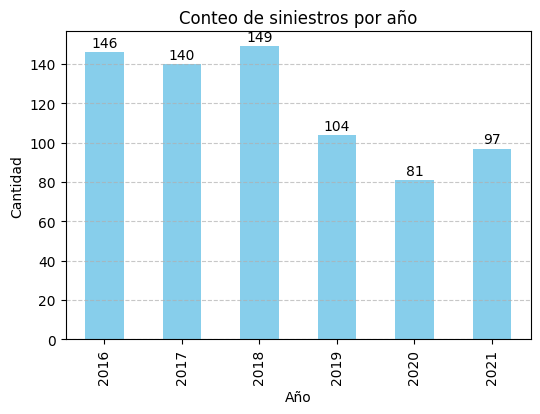

In [42]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["AAAA"]

# Contar la frecuencia de cada valor único en la columna
conteo_valores = columna.value_counts()
conteo_valores = conteo_valores.sort_index(ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='skyblue')
plt.title("Conteo de siniestros por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Hacemos un Boxplot para ver la distribución de los datos en la columna 'AAAA'

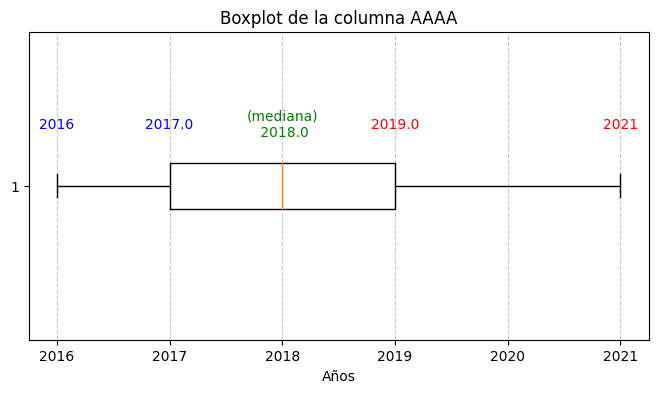

In [43]:
columna = "AAAA"
df = homicidios_combinado
data = df[columna]

# Crear el boxplot con Matplotlib
plt.figure(figsize=(8, 4))  # Tamaño de la figura
plt.boxplot(data, vert=False)  # vert=False para un gráfico horizontal
plt.xlabel('Años')  # Etiqueta del eje x
plt.title('Boxplot de la columna ' + columna)  # Título del gráfico

# Agregar grid al eje y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calcular los cuartiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
minimo = data.min()
maximo = data.max()

# Agregar los valores de los cuartiles al gráfico
plt.text(q1, 1.2, q1, va='center', ha='center', color='blue')
plt.text(q2, 1.2, f"(mediana)\n {q2}", va='center', ha='center', color='green')
plt.text(q3, 1.2, q3, va='center', ha='center', color='red')
plt.text(minimo, 1.2, minimo, va='center', ha='center', color='blue')
plt.text(maximo, 1.2, maximo, va='center', ha='center', color='red')

# Mostrar el gráfico
plt.show()

`SEMESTRE`

In [44]:
#Llamamos a la funcion para la columna 'SEMESTRE'
col_statistics(homicidios_combinado, 'SEMESTRE')

registros únicos:  12

count        717
unique        12
top       2016_2
freq          81
Name: SEMESTRE, dtype: object

          Cantidad  Porcentaje (%)
SEMESTRE                          
2016_2          81           11.30
2018_2          79           11.02
2017_2          71            9.90
2018_1          70            9.76
2017_1          69            9.62
2016_1          65            9.07
2019_1          57            7.95
2021_1          55            7.67
2020_2          50            6.97
2019_2          47            6.56
2021_2          42            5.86
2020_1          31            4.32


**Conclusiones [SEMESTRE]**
* Como podemos observar, el valor mas frecuente corresponde al del segundo semetre de cada año, lo que sugiere que la mayoria de los siniestros se generan en el segundo semetre. 
* El segundo semetre cuenta con el 51.61% de los registros, mientras que el primer semetre cuenta con el 48.39% de los registros.

Procedemos a crear un barplot para ver el conteo de siniestros en la columna 'SEMESTRE'

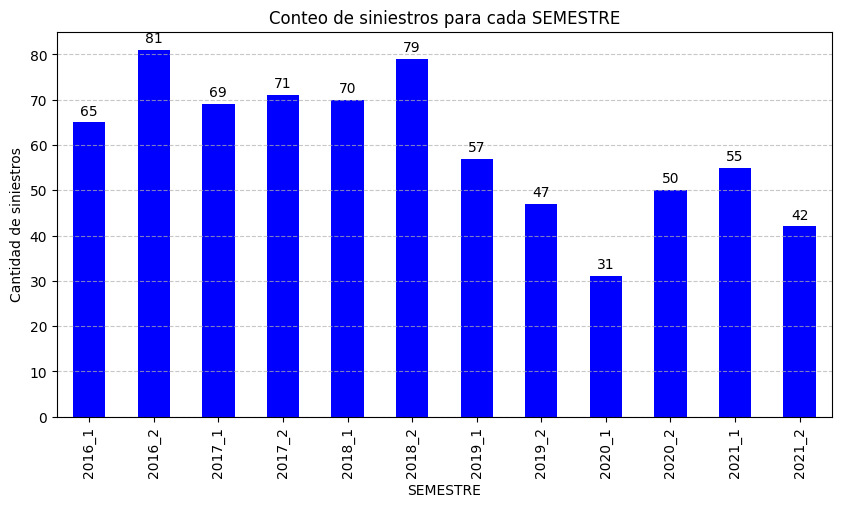

In [45]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["SEMESTRE"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_index(ascending=True)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='blue')
plt.title("Conteo de siniestros para cada SEMESTRE")
plt.xlabel("SEMESTRE")
plt.ylabel("Cantidad de siniestros")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

`TIPO_DE_CALLE`

In [46]:
#Llamamos a la funcion para la columna 'TIPO_DE_CALLE'
col_statistics(homicidios_combinado, 'TIPO_DE_CALLE')

registros únicos:  4

count         717
unique          4
top       AVENIDA
freq          442
Name: TIPO_DE_CALLE, dtype: object

               Cantidad  Porcentaje (%)
TIPO_DE_CALLE                          
AVENIDA             442           61.65
CALLE               138           19.25
GRAL PAZ             69            9.62
AUTOPISTA            68            9.48


**Conclusiones [TIPO_DE_CALLE]**
* Tenemos 4 registros únicos dentro de la columna 'TIPO_DE_CALLE'. Estos hacen referencias a las diferentes arterias dentro de CABA. Cabe recalcar que 'GRAL PAZ' es tanto una avenida como tambien una autopista en ciertas partes, por ese motivo la dejamos como un registro unico.
* El valor mas frecuente corresponde a 'AVENIDA', ya que en esta ocurren la mayoria de los siniestrios con un valor de 442.
* La arteria con mayor frecuencia de siniestros es: AVENIDA (61.65%)
* La arteria con menor frecuencia de siniestros es: AUTOPISTA (9.48%)

Procedemos a crear un barplot para ver la distribucion de la columna 'TIPO_DE_CALLE'

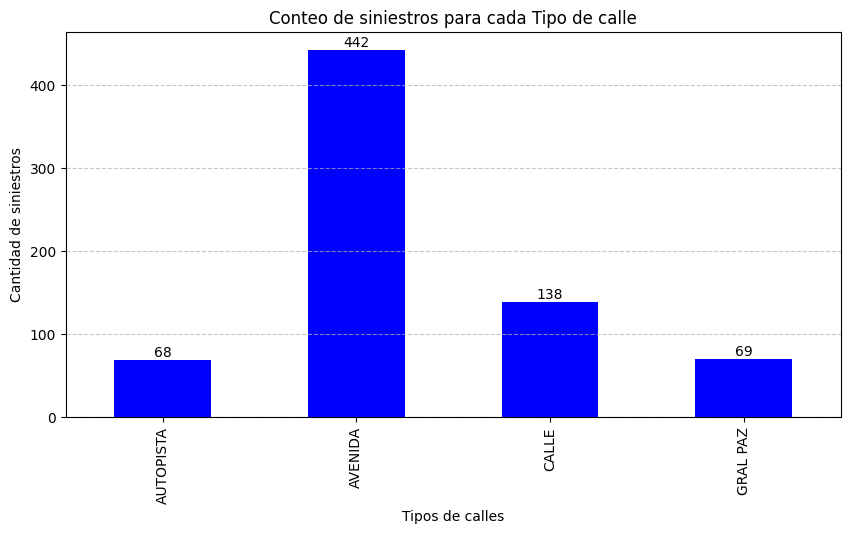

In [47]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["TIPO_DE_CALLE"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_index(ascending=True)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='blue')
plt.title("Conteo de siniestros para cada Tipo de calle")
plt.xlabel("Tipos de calles")
plt.ylabel("Cantidad de siniestros")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

`COMUNA`

In [48]:
#Llamamos a la funcion para la columna 'COMUNA'
col_statistics(homicidios_combinado, 'COMUNA')

registros únicos:  16

count    717.000000
mean       7.430962
std        4.385067
min        0.000000
25%        4.000000
50%        8.000000
75%       11.000000
max       15.000000
Name: COMUNA, dtype: float64

        Cantidad  Porcentaje (%)
COMUNA                          
1             93           12.97
4             79           11.02
9             75           10.46
8             67            9.34
7             62            8.65
3             46            6.42
15            45            6.28
13            40            5.58
12            39            5.44
14            37            5.16
11            33            4.60
10            30            4.18
2             25            3.49
6             22            3.07
5             22            3.07
0              2            0.28


**Conclusiones [COMUNA]**
* Contamos con 16 registros únicos para la columna 'COMUNA'. Esto hace referencia a las 15 comunas dentro de CABA, desde la 0 a la 15.
* Como podemos ver la frecuencia de siniestros es mayor en la comuna 1 con 93 siniestros, seguido de la comuna 4 con 79.
* La comuna con mayor frecuencia de siniestros es: 1 (12.97%)
* La comuna con menor frecuencia de siniestros es: 0 (0.28%)

Hacemos un barplot para ver la distribucion de siniestros en cada COMUNA

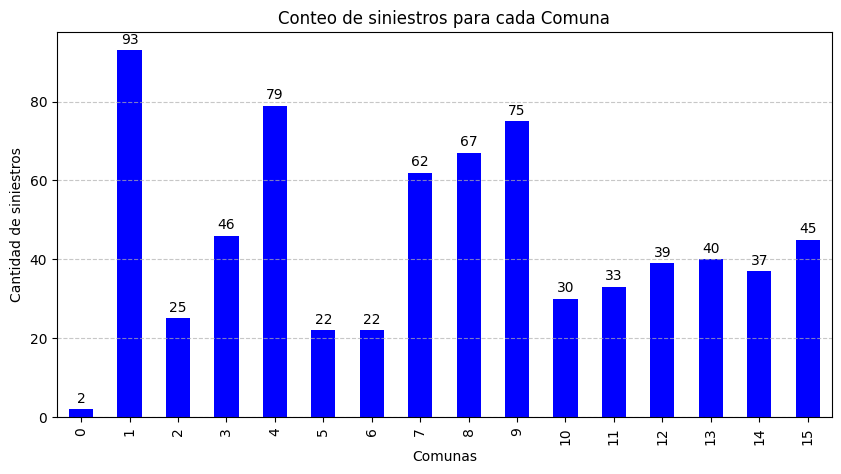

In [49]:
# Filtrar la columna que deseas incluir en el gráfico
columna = homicidios_combinado["COMUNA"]

# Contar la frecuencia de cada valor único en la columna y ordenar de manera descendente
conteo_valores = columna.value_counts().sort_index(ascending=True)

# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico si es necesario
ax = conteo_valores.plot(kind='bar', color='blue')
plt.title("Conteo de siniestros para cada Comuna")
plt.xlabel("Comunas")
plt.ylabel("Cantidad de siniestros")

# Agregar etiquetas de datos (valores) sobre cada barra
for i, v in enumerate(conteo_valores):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

# Mostrar un grid solo en el eje Y del gráfico
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

`SEXO`

In [50]:
#Llamamos a la funcion para la columna 'SEXO'
col_statistics(homicidios_combinado, 'SEXO')

registros únicos:  3

count           717
unique            3
top       MASCULINO
freq            545
Name: SEXO, dtype: object

           Cantidad  Porcentaje (%)
SEXO                               
MASCULINO       545           76.01
FEMENINO        166           23.15
SD                6            0.84


**Conclusiones [SEXO]**
* Contamos con 3 registros únicos. Dichos registros hacen referencia a 'MASCULINO', 'FEMENINO' Y 'SD', este ultimo son las personas que no se encontraron datos de su sexo, pero teniendo en cuenta la frecuencia de estas, las dejamos ya que no representan un cambio en el analisis.
* Como podemos observar el dato mas frecuente es 'MASCULINO' con 545 siniestros viales.
* El sexo con mayor frecuencia es: MASCULINO (76.01%)
* El sexo con menor frecuencia es: FEMENINO (23.15%)

hacemos un grafico de torta para mostrar la distribucion por sexo

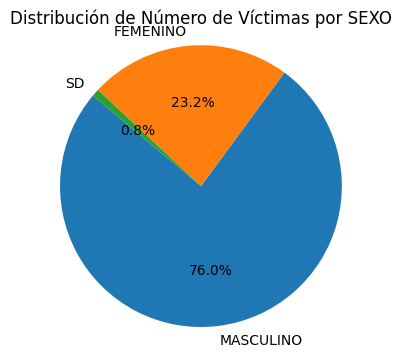

In [51]:
# Calcular la frecuencia de cada valor en la columna "N_VICTIMAS"
frecuencia = homicidios_combinado["SEXO"].value_counts()

# Crear un gráfico de tarta
plt.figure(figsize=(4, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Número de Víctimas por SEXO")
plt.axis('equal')  # Hace que el gráfico sea circular

# Mostrar el gráfico
plt.show()

# KPI's